اجرای کا-نزدیک‌ترین همسایگی بر روی مجموعه داده گل زنبق


<a href="https://colab.research.google.com/github/mamintoosi/DM/blob/master/code/KNN/KNN-iris.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter


#KNN on Iris Dataset

We are going to use a very famous dataset called Iris.

Attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

We will just use two features for easier visualization, sepal length and width.

Class:


*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica










#Load the Dataset

In [31]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Describe the Dataset

In [32]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#Split into X and y

In [33]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]


In [34]:
X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [36]:
X = np.asarray(X)
y = np.asarray(y)
print(X, y)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#Split into training and testing

In [37]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,  # shuffle the data to avoid bias
                                                    random_state=0)


In [38]:
print(X_train.shape, y_train.shape)
print(X_train[:5])
print(y_train[:5])


(120, 4) (120,)
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
[2 1 0 2 2]


In [39]:
print(
    f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')


training set size: 120 samples 
test set size: 30 samples


In [40]:
K = 3
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
print(y_test)
print(y_pred_sklearn)
accuracy = accuracy_score(y_pred_sklearn, y_test)
print(accuracy)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
0.9666666666666667


#Normalize the Dataset

In [41]:
scaler = Normalizer().fit(X_train)  # the scaler is fitted to the training set
# the scaler is applied to the training set
normalized_X_train = scaler.transform(X_train)
# the scaler is applied to the test set
normalized_X_test = scaler.transform(X_test)


In [42]:
print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_X_train[0:5])


x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


#Visualize the Dataset before and after Normalization

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

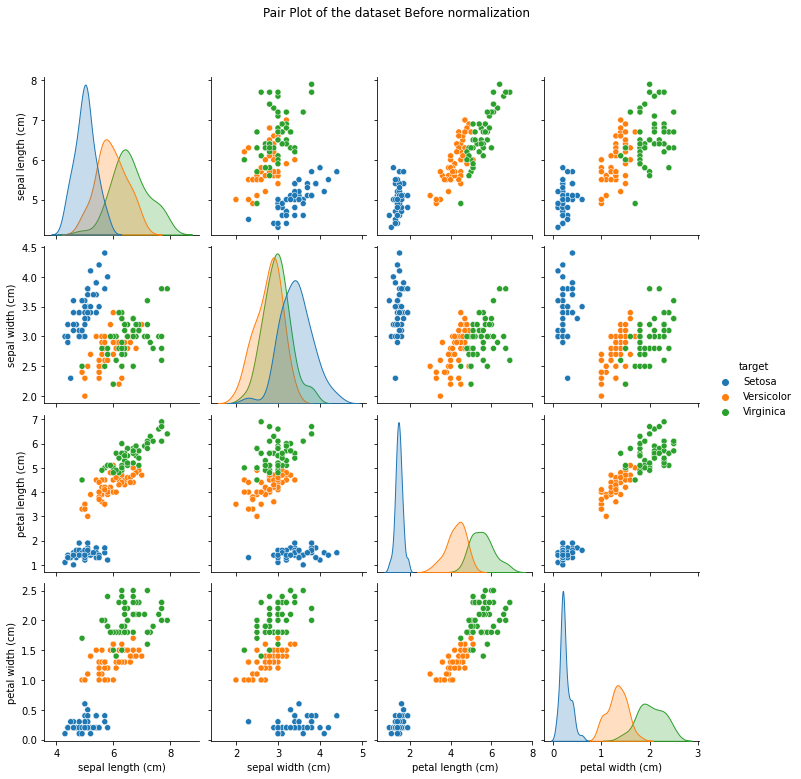

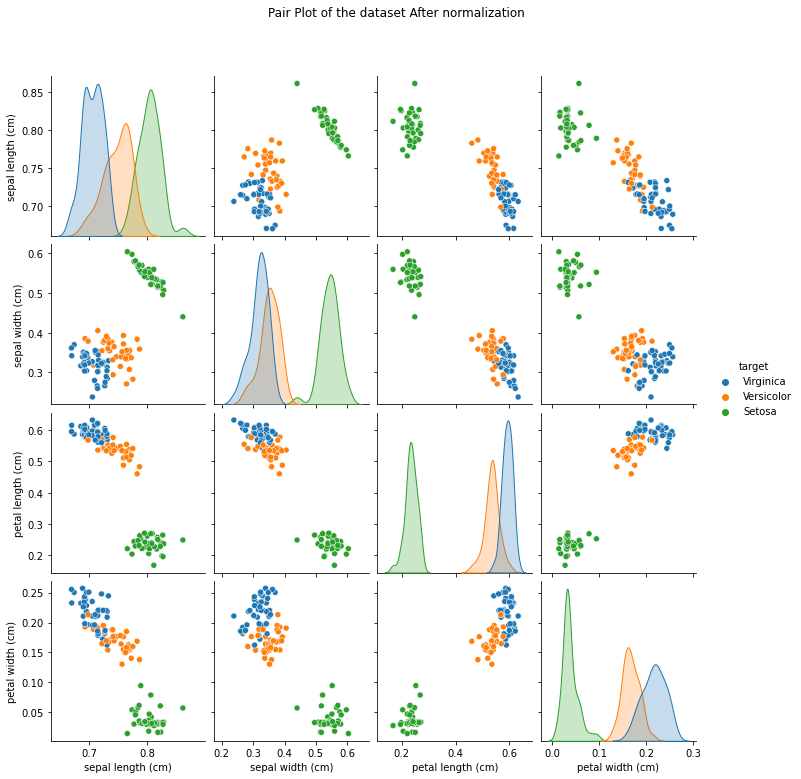

In [43]:
# Before
# View the relationships between variables; color code by species type
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}  # dictionary

before = sns.pairplot(iris_df.replace({'target': di}), hue='target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

# After
iris_df_2 = pd.DataFrame(data=np.c_[normalized_X_train, y_train],
                         columns=iris['feature_names'] + ['target'])
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after = sns.pairplot(iris_df_2.replace({'target': di}), hue='target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)


#KNN Step 1 (Euclidean Distance)









In [44]:
def distance_ecu(X_train, x_test_point):
    """
    Input:
      - X_train: corresponding to the training data
      - x_test_point: corresponding to the test point

    Output:
      -distances: The distances between the test point and each point in the training data.

    """
    distances = []  # create empty list called distances
    for row in range(len(X_train)):  # Loop over the rows of X_train
        current_train_point = X_train[row]  # Get them point by point
        current_distance = 0  # initialize the distance by zero

        for col in range(len(current_train_point)):  # Loop over the columns of the row

            current_distance += (current_train_point[col] -
                                 x_test_point[col]) ** 2
            # Or current_distance = current_distance + (X_train[i] - x_test_point[i])**2
        current_distance = np.sqrt(current_distance)

        distances.append(current_distance)  # Append the distances

    # Store distances in a dataframe
    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances


#KNN Step 2 (Find the nearest neighbors)

In [45]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)

    # Take only the first K neighbors
    df_nearest = df_nearest[:K]
    return df_nearest


#KNN Step 3 (Classify the point based on a majority vote)

In [46]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    # Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote = Counter(y_train[df_nearest.index])

    y_pred = counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred


#KNN Full Algorithm: Putting Everything Together

In [47]:
def KNN_from_scratch(X_train, y_train, X_test, K):
    """
    Input:
    -X_train: the full training dataset
    -y_train: the labels of the training dataset
    -X_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred = []

    # Loop over all the test set and perform the three steps
    for x_test_point in X_test:
        distance_point = distance_ecu(X_train, x_test_point)  # Step 1
        df_nearest_point = nearest_neighbors(distance_point, K)  # Step 2
        y_pred_point = voting(df_nearest_point, y_train)  # Step 3
        y_pred.append(y_pred_point)

    return y_pred


#Test the KNN Algorithm on the test dataset

In [48]:
K = 3
y_pred_scratch = KNN_from_scratch(
    normalized_X_train, y_train, normalized_X_test, K)
print(y_pred_scratch)
accuracy = accuracy_score(y_pred_scratch, y_test)
print(accuracy)


[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]
0.9666666666666667


#Compare our implementation with Sklearn library

In [49]:
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, y_train)
y_pred_sklearn_normalized = knn.predict(normalized_X_test)
print(y_pred_sklearn_normalized)
accuracy = accuracy_score(y_pred_sklearn_normalized, y_test)
print(accuracy)


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 2 0 0 2 1 0 0 2 0 0 1 1 0]
0.9666666666666667


#Check if the output is exactly the same

In [50]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))


False


#Calculate the accuracy of both methods

In [51]:
print(
    f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(
    f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')


The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


#Perform Hyper-parameter Tuning using K-fold Cross Validation

In [52]:
n_splits = 4  # Choose the number of splits
kf = KFold(n_splits=n_splits)  # Call the K Fold function

accuracy_k = []  # Keep track of the accuracy for each K
k_values = list(range(1, 30, 2))  # Search for the best value of K

for k in k_values:  # Loop over the K values
    accuracy_fold = 0
    # Loop over the splits
    for normalized_X_train_fold_idx, normalized_x_valid_fold_idx in kf.split(normalized_X_train):
        # fetch the values
        normalized_X_train_fold = normalized_X_train[normalized_X_train_fold_idx]
        y_train_fold = y_train[normalized_X_train_fold_idx]

        normalized_X_test_fold = normalized_X_train[normalized_x_valid_fold_idx]
        y_valid_fold = y_train[normalized_x_valid_fold_idx]
        y_pred_fold = KNN_from_scratch(
            normalized_X_train_fold, y_train_fold, normalized_X_test_fold, k)

        # Accumulate the accuracy
        accuracy_fold += accuracy_score(y_pred_fold, y_valid_fold)
    accuracy_fold = accuracy_fold / n_splits  # Divide by the number of splits
    accuracy_k.append(accuracy_fold)


In [53]:
# creates a tuple with accuracy corresponding to k value
print(
    f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}')


The accuracy for each K value was [(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]


In [54]:
print(
    f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')


Best accuracy was 0.9666666666666668, which corresponds to a value of K= 1
